<a href="https://colab.research.google.com/github/KhushiCode/myrepo/blob/main/creditfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [6]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# dataset informations
credit_card_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

DATA IS IMBALANCE

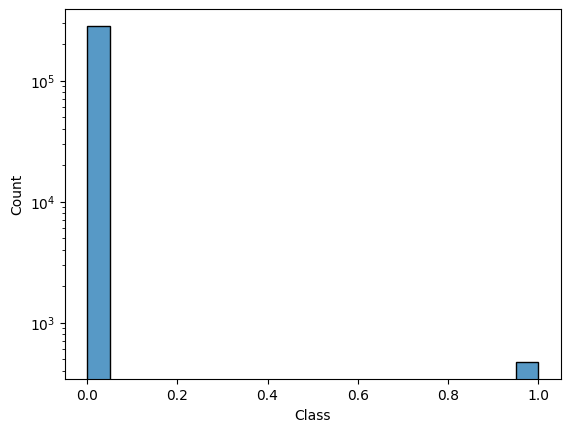

In [ ]:
sns.histplot(credit_card_data['Class'])
plt.yscale('log')
plt.show()

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
total_duplicates=credit_card_data.duplicated().sum()
print(total_duplicates)

1081


In [8]:
credit_card_data.drop_duplicates(inplace=True)

In [9]:
credit_card_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

here,
0-->Normal Transaction
1 --> Fraudulent Transaction


In [10]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [11]:
# statistical measures of the data
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


Unbalanced data sampling methods

1) Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 473 , so randomly take 473 normal transactions


In [15]:
legit_sample = legit.sample(n=473)

Concatenating two DataFrames



In [16]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
64159,51054.0,-0.518327,0.767199,0.551097,-1.758157,-0.096851,-1.280265,0.440814,-1.172962,-1.455989,...,0.993059,0.417713,-0.229951,0.439233,0.451160,-0.255985,0.135468,0.043296,15.00,0
169633,119788.0,0.046826,0.090348,0.047160,-1.726720,0.793521,0.395270,0.442563,0.070384,-1.405276,...,0.256296,0.881870,0.064138,-1.087317,-0.936594,-0.237016,0.249197,0.200718,15.00,0
165539,117496.0,1.974821,-0.373842,-0.222577,0.532897,-0.783771,-0.609160,-0.566821,-0.100129,1.391430,...,0.256660,1.037599,0.076449,0.097001,-0.029038,-0.158793,0.045400,-0.035976,10.25,0
88044,61961.0,-1.484201,0.067487,1.180362,0.227025,-0.362224,0.272743,2.302544,-0.023347,-1.285508,...,0.335422,0.217930,0.520277,0.173064,0.751895,-0.438959,-0.101098,0.074640,376.60,0
283020,171316.0,2.013691,-0.108723,-1.007693,0.323577,-0.145682,-0.946591,0.071817,-0.184335,0.300602,...,-0.233649,-0.582757,0.341730,0.072900,-0.346356,0.173302,-0.075417,-0.069613,1.29,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_dataset['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95457.456660,0.039394,-0.028088,0.010430,0.106951,0.152686,-0.011301,0.023693,0.009093,-0.039326,...,0.015641,0.022408,-0.016873,0.015871,0.005364,-0.036091,-0.019210,0.003036,0.015203,84.91630
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.87186


here we compare old and new dataset and see the mean values are almost similar therefore it is a good sample.

Splitting the data into Features(V1 to V28) & Targets(class)


In [19]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
64159    51054.0 -0.518327  0.767199  0.551097 -1.758157 -0.096851 -1.280265   
169633  119788.0  0.046826  0.090348  0.047160 -1.726720  0.793521  0.395270   
165539  117496.0  1.974821 -0.373842 -0.222577  0.532897 -0.783771 -0.609160   
88044    61961.0 -1.484201  0.067487  1.180362  0.227025 -0.362224  0.272743   
283020  171316.0  2.013691 -0.108723 -1.007693  0.323577 -0.145682 -0.946591   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

36069     0
195074    0
230163    0
13902     0
195404    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


Split the data into Training data & Testing Data

train_test_split function from the sklearn.model_selection module in the scikit-learn library. This function is commonly used in machine learning to split a dataset into training and testing sets.

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

*   X and Y:
X is the feature matrix (input data).
Y is the target vector (output data).
These are the data used to train a machine learning model.
* test_size=0.2: Specifies that 20% of the data is allocated to the test
set.
The remaining 80% is used as the training set.
You can adjust this parameter based on your preferences.
*stratify=Y:The stratify parameter ensures that the splitting process maintains the same distribution of target classes in both the training and testing sets as the original dataset.
In this case, Y is passed as the argument to stratify, indicating that the target variable's distribution should be preserved in the splits. This is particularly useful when dealing with imbalanced datasets.
*random_state=2: Sets a seed for the random number generator.
Ensures reproducibility; running the code multiple times will yield the same split.
The specific number (2 in this case) is arbitrary and can be any integer.

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(946, 30) (756, 30) (190, 30)


Model Training

Logistic Regression

In [22]:
model = LogisticRegression()

In [23]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [24]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9325396825396826


In [27]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9315789473684211
